In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patheffects as path_effects
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.patheffects as path_effects
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report,roc_auc_score,roc_curve, auc
import time
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.inspection import permutation_importance
import time
data = pd.read_csv('BankChurners.csv')#read csv file

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
data.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [7]:
##Show all data witn number type
data.select_dtypes('number')

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                    1.625                  0.061  
1                    3.714                  0.105  
2                    2.333                  0.000  
3                    2.333                  0.760  
4                    2.500                  0.000  
...                    ...                    ...  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[10127 rows x 14 columns]

In [8]:
cols = data.columns
num_cols = data._get_numeric_data().columns
categorical = list(set(cols) - set(num_cols))

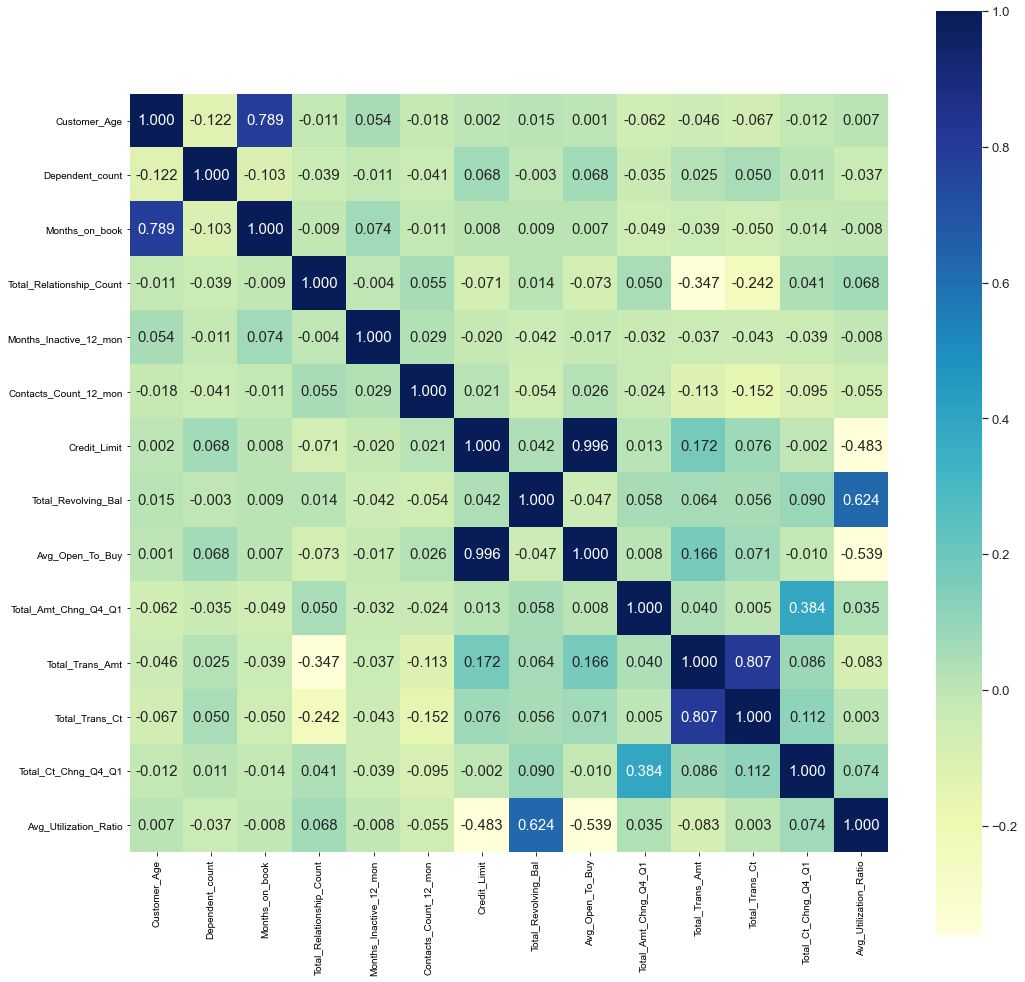

In [9]:
# numerical_data = data[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count'
#                               ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal'
#                               ,'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
#                               'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

# corrMatrix = numerical_data.corr()

num_cols = data._get_numeric_data().columns
corrMatrix = data.loc[:, num_cols].corr()

plt.subplots(figsize=(17,17))
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
sns.heatmap(corrMatrix,
            annot=True,
            cmap="YlGnBu",
            fmt=".3f",
            annot_kws={'size':15},
            robust=True,
            square=True)
plt.show()

From the correlation table above, it indicate that the customer's period of relationship with the bank is correlated with the customer age positively. And the average of open to buy credit line is also directly correlated with the customer's credit limit on their credit cards. Next, the average utilization ratio is also correlated positively with the total revolving balance on the credit card of the customers. Lastly, the customers' total transaction count is also correlated positively with the total transaction amount.

In [10]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.select_dtypes(include=[np.number]).columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    corr = df.select_dtypes(include=[np.number]).corr()
    au_corr = corr.abs().unstack()
    labels_to_drop = get_redundant_pairs(df.select_dtypes(include=[np.number]))
    #From corrolation table, drop the diagonals(which gives 1 corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
Credit_Limit              Avg_Open_To_Buy          0.995981
Total_Trans_Amt           Total_Trans_Ct           0.807192
Customer_Age              Months_on_book           0.788912
Total_Revolving_Bal       Avg_Utilization_Ratio    0.624022
Avg_Open_To_Buy           Avg_Utilization_Ratio    0.538808
Credit_Limit              Avg_Utilization_Ratio    0.482965
Total_Amt_Chng_Q4_Q1      Total_Ct_Chng_Q4_Q1      0.384189
Total_Relationship_Count  Total_Trans_Amt          0.347229
                          Total_Trans_Ct           0.241891
Credit_Limit              Total_Trans_Amt          0.171730
dtype: float64


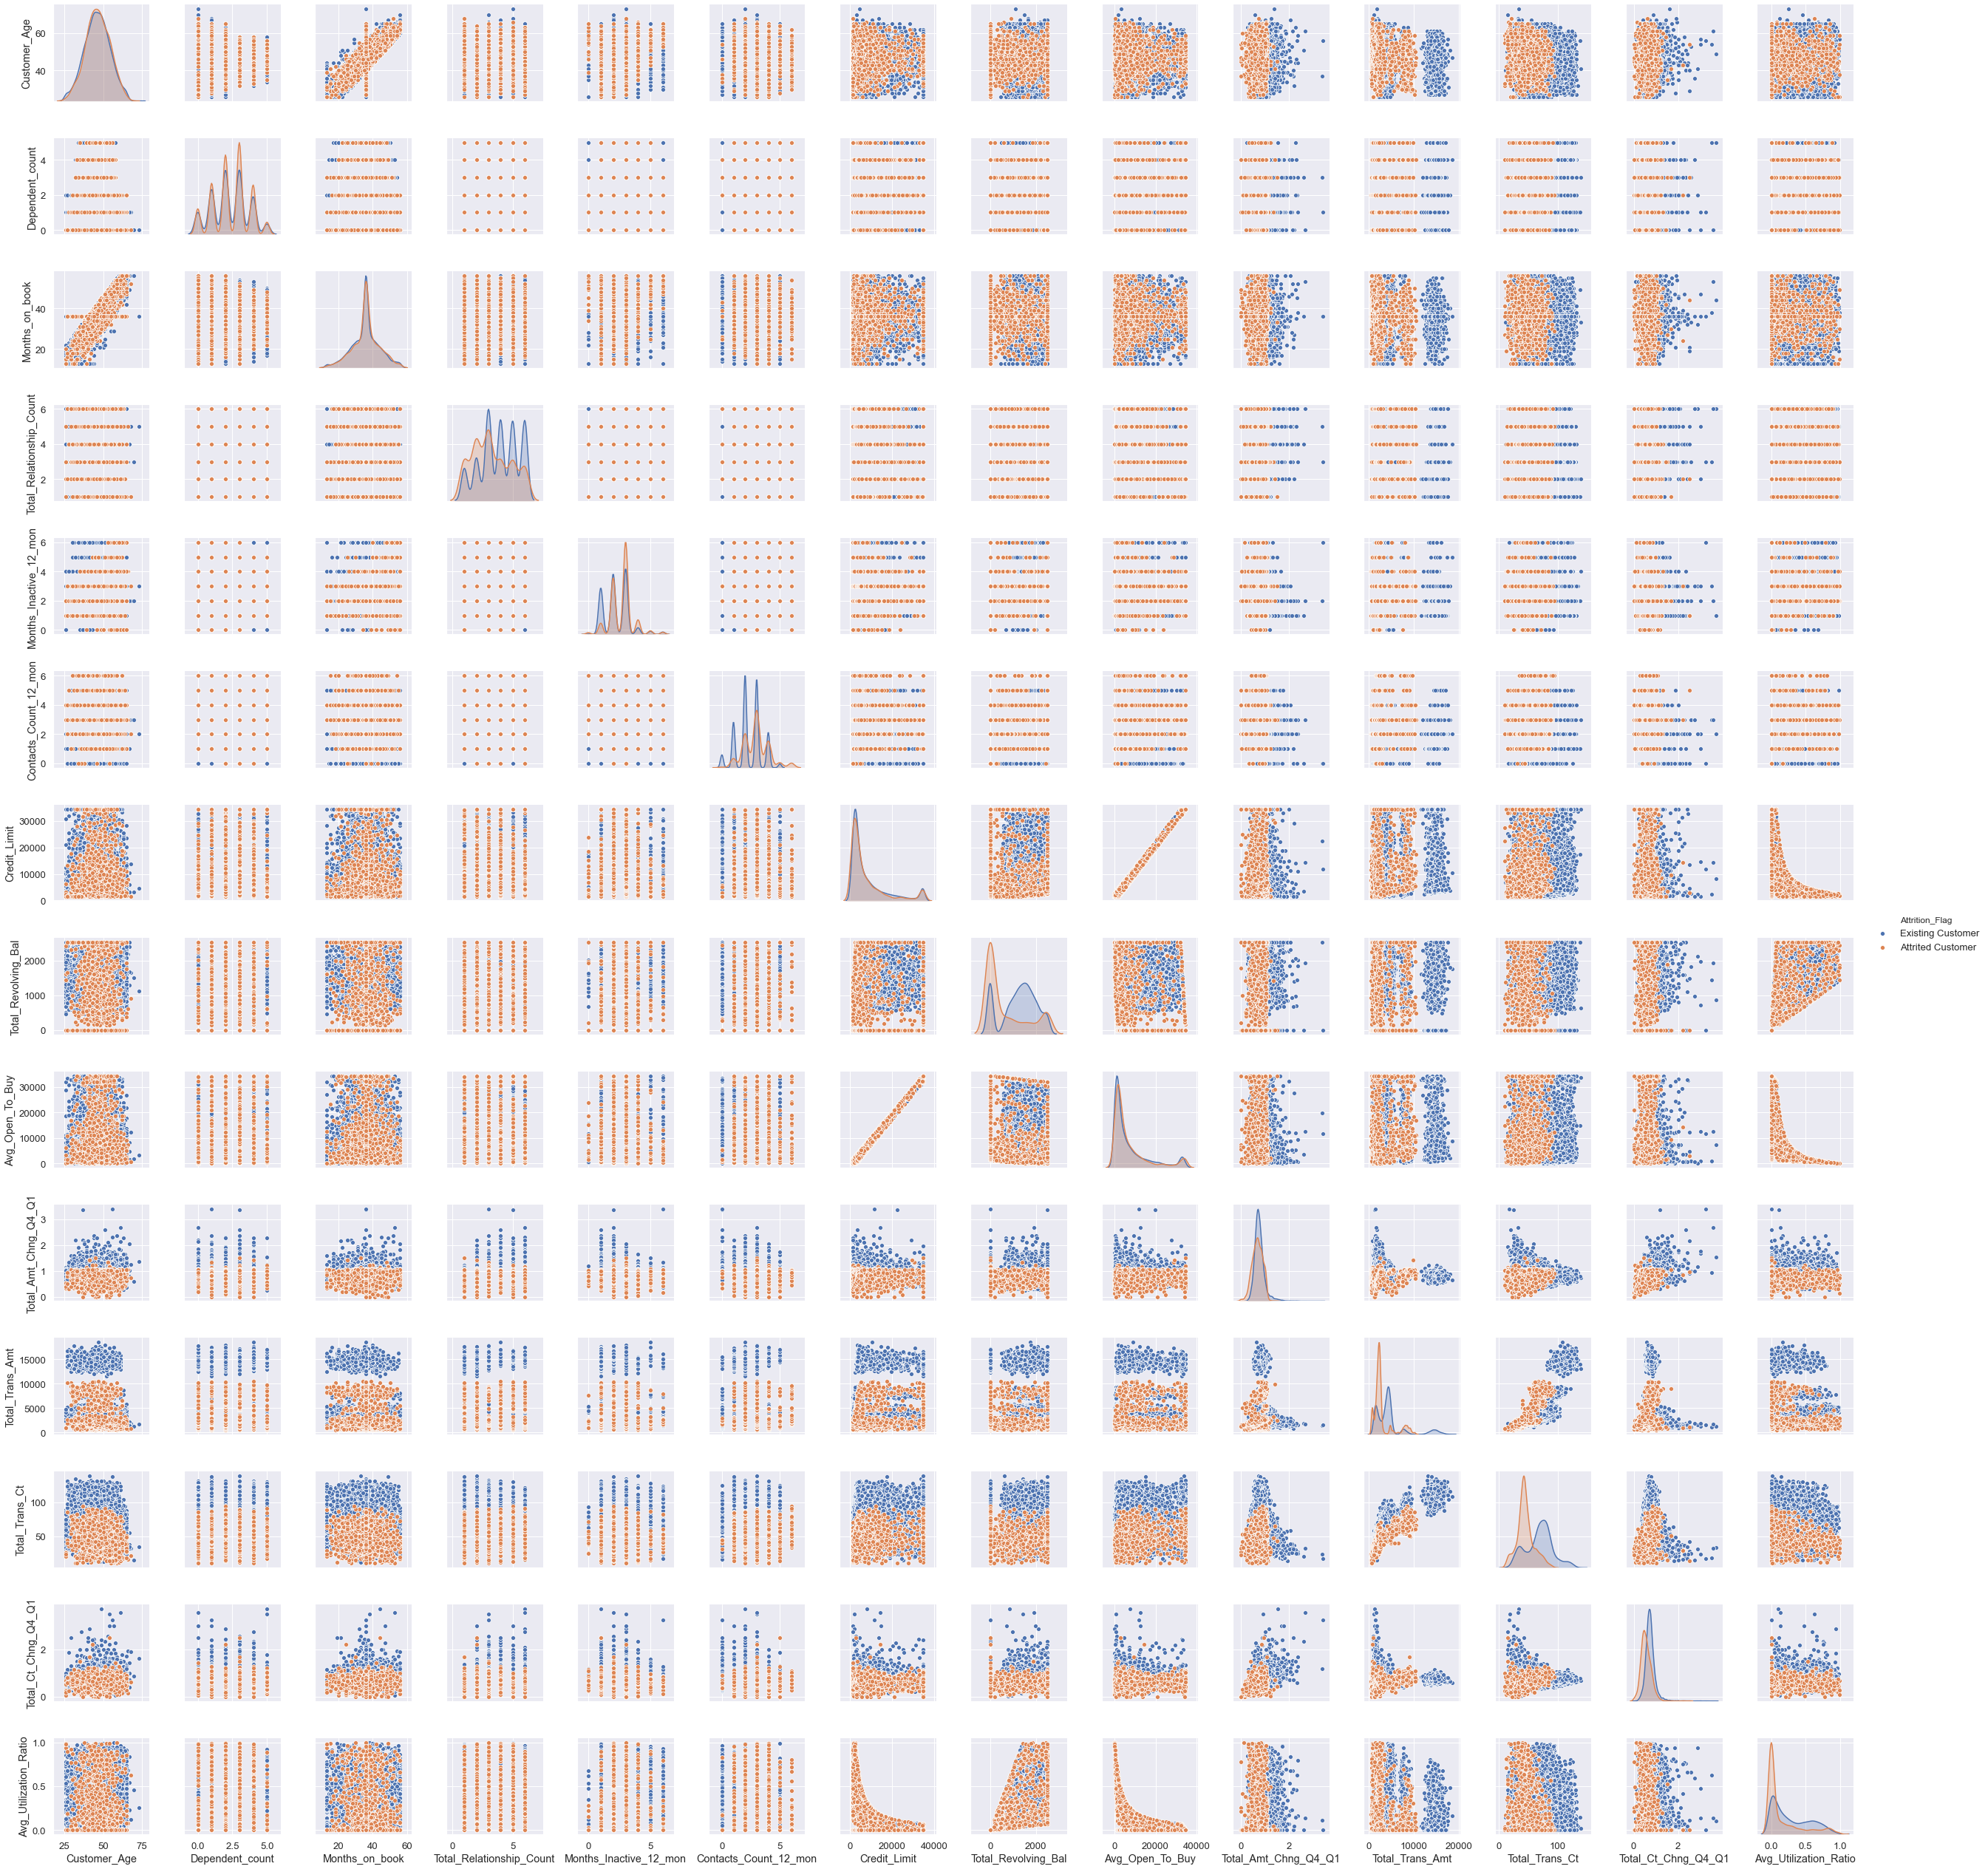

In [11]:
import seaborn as sns

sns.pairplot(data,hue='Attrition_Flag', height=2.5)

After we plot the pairplot shown above, we can tell that most of the churned customer has lower value meanwhile a lot of non churned customer have higher value.

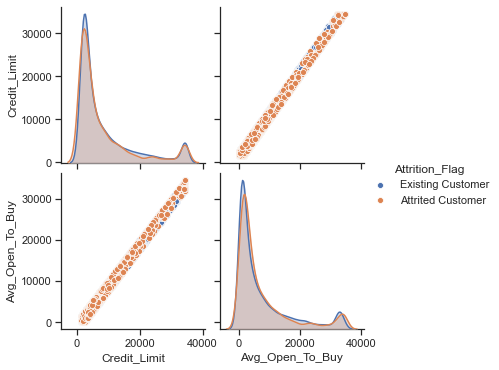

In [12]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,vars =["Credit_Limit","Avg_Open_To_Buy"],hue='Attrition_Flag')

By observing the pair plot above between average open to buy and credit limit, we know that this two attribute are highly correlated. The higher the credit limit, the higher the average open to buy. Althought both attributes are highly correlated to each other, we observed that this two attibutes does not seperate churn and non churn customer well.


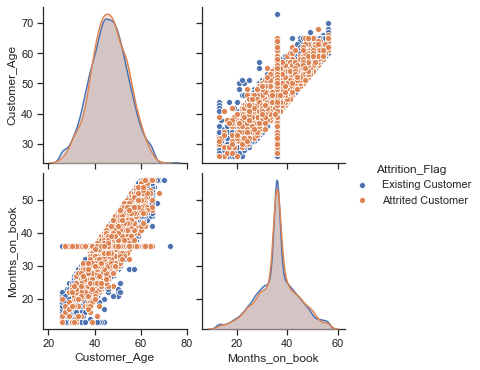

In [13]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,vars =["Customer_Age","Months_on_book"],hue='Attrition_Flag')

By orserving the pairplot above between age and months on book, we observed that the higher the customer age, the higher the months on book. Pairplot above was not able to seperate both churn and non churn customer well. Churn and non churn customers are distibuted everywhere in the pair plot graph.

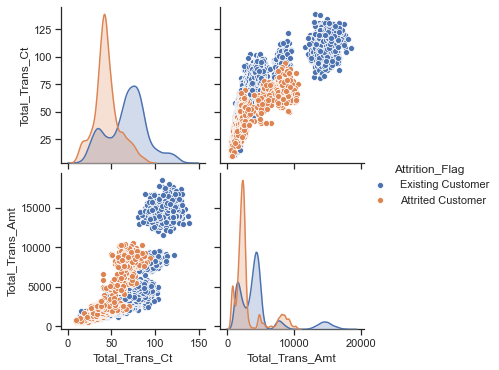

In [14]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,vars =["Total_Trans_Ct","Total_Trans_Amt"],hue='Attrition_Flag')

By orserving the pairplot above between transaction count and transaction amount, we can tell the people who churned mostly from lesser credit card service transaction count and transaction amount. Most of the churned customer gather on bottom left of the pair plot. The pairplot above also shows that higher the transaction amount, the higher the transaction count as well.

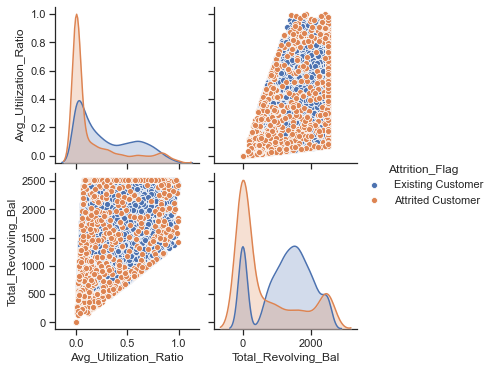

In [15]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,vars =["Avg_Utilization_Ratio","Total_Revolving_Bal"],hue='Attrition_Flag')

As the pairplot shown above, we have the conclusion that most of the churned customer for credit card service have lower average utilization ratio compared to non churned customer. On the other hand, non churned customer has higher in the revolving balance, meanwhile non churned customer has the lower revolving balance. 

In [16]:
# Plot categorical columns
def pltCountplot(cat, df):
    
    fig, axis = plt.subplots(len(cat) // 2, 2, figsize=(20,16))  

    index = 0
    sns.set()
    for i in range(len(cat) // 2):
            
        for j in range(2):

            ax = sns.countplot(cat[index], data=df, ax=axis[i][j]);
        
            #for item in ax.get_xticklabels():
            #    item.set_rotation(15)

            for p in ax.patches:
                ax.annotate(format(p.get_height()/len(df)*100, '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
            index += 1

def pltcrosstab(cat, df):
    
    fig, axis = plt.subplots((len(cat) // 3), 3, figsize=(20,10))  
    fig.tight_layout()

    index = 0
    sns.set()
    for i in range((len(cat) // 3)):
            
        for j in range(3):
            
            # Since we have 11 numerical columns, some plots will be empty
            if index == len(cat):
                break
            
            ax = pd.crosstab(df[cat[index]], df['Attrition_Flag']).plot(kind='bar', ax=axis[i][j])
        
            for item in ax.get_xticklabels():
                item.set_rotation(20)

            for p in ax.patches:
                ax.annotate(format(p.get_height()/len(df)*100, '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points') 
            
            index += 1
            ax.legend(loc="best") 
            
    plt.subplots_adjust(wspace=0.2, hspace=0.4)

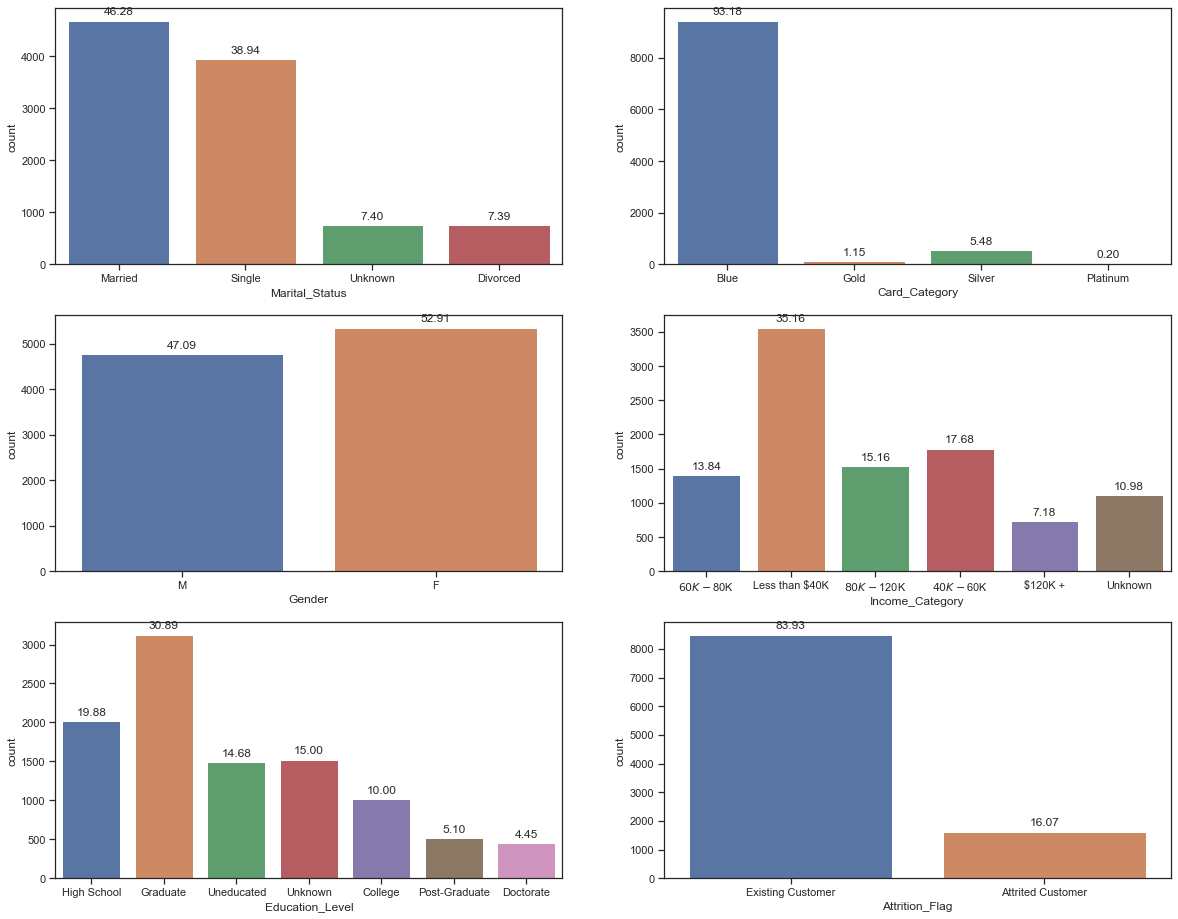

In [17]:
pltCountplot(categorical, data)

## EDA Categorical Data
There are total 6 categorical data in this bank chunrkers datasets. There are total 10127 of entries in this dataset. The data seems to be unbalanced with 83.93% of the entries are existing customer while only 16.07% which may affect the performance of prediction models. Hence, obtaining higher recall rate and lower false positive rate is better than accuracy and precision in this case. This is because the bank do no wish to miss out customer that going to churn. Although the isNull() function shows no missing data but we can observed that there are unknow category in income category, education level and maritial status. For the card category column, most of the entries are blue card category.

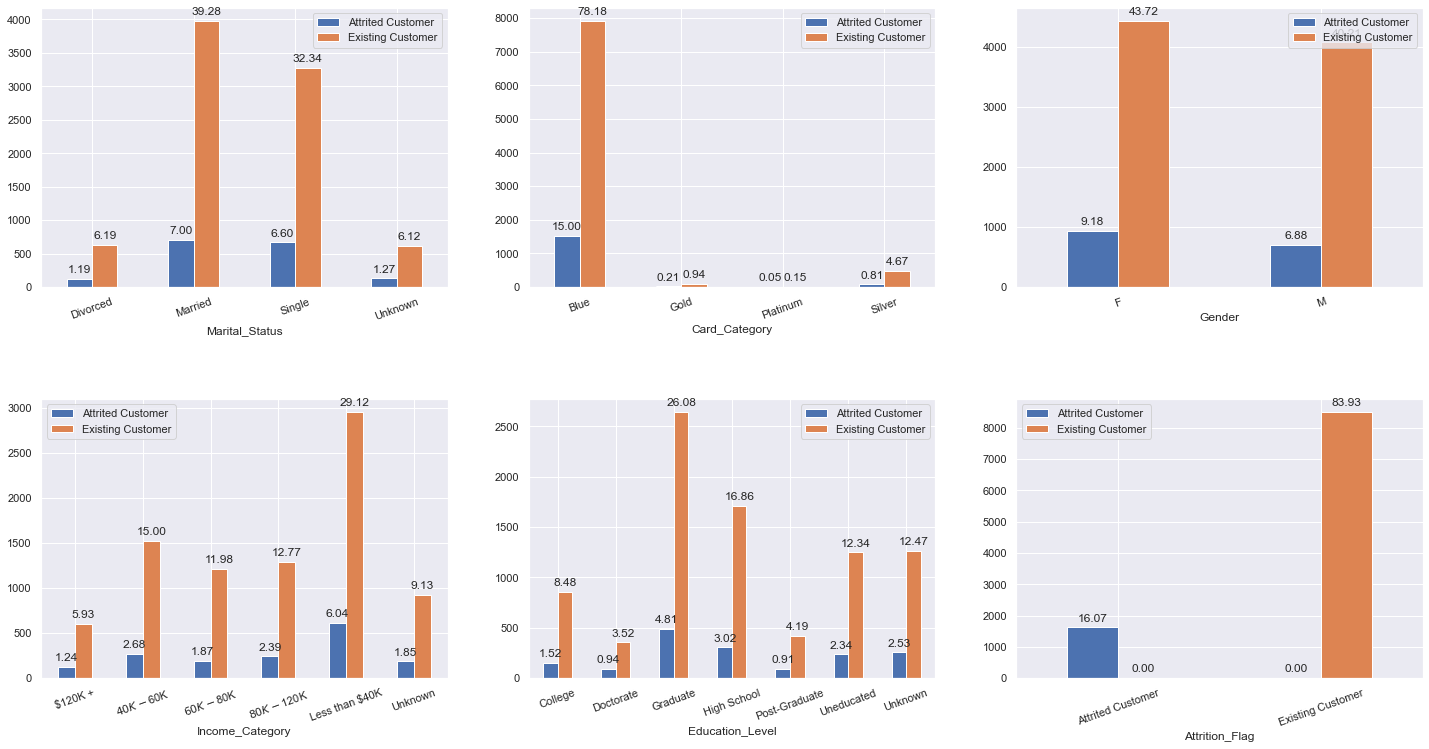

In [18]:
pltcrosstab(categorical, data)

## Crosstab Chart¶
The chart above shows the percentage of existing customer or churn customer in each categorical column. The data seems unbalanced which cause that not much information can be found by just looking at the chart above.


## Check distribution of numerical data


Numerical column skewness value > 0.75
Total_Ct_Chng_Q4_Q1     2.064031
Total_Trans_Amt         2.041003
Total_Amt_Chng_Q4_Q1    1.732063
Credit_Limit            1.666726
Avg_Open_To_Buy         1.661697
dtype: float64


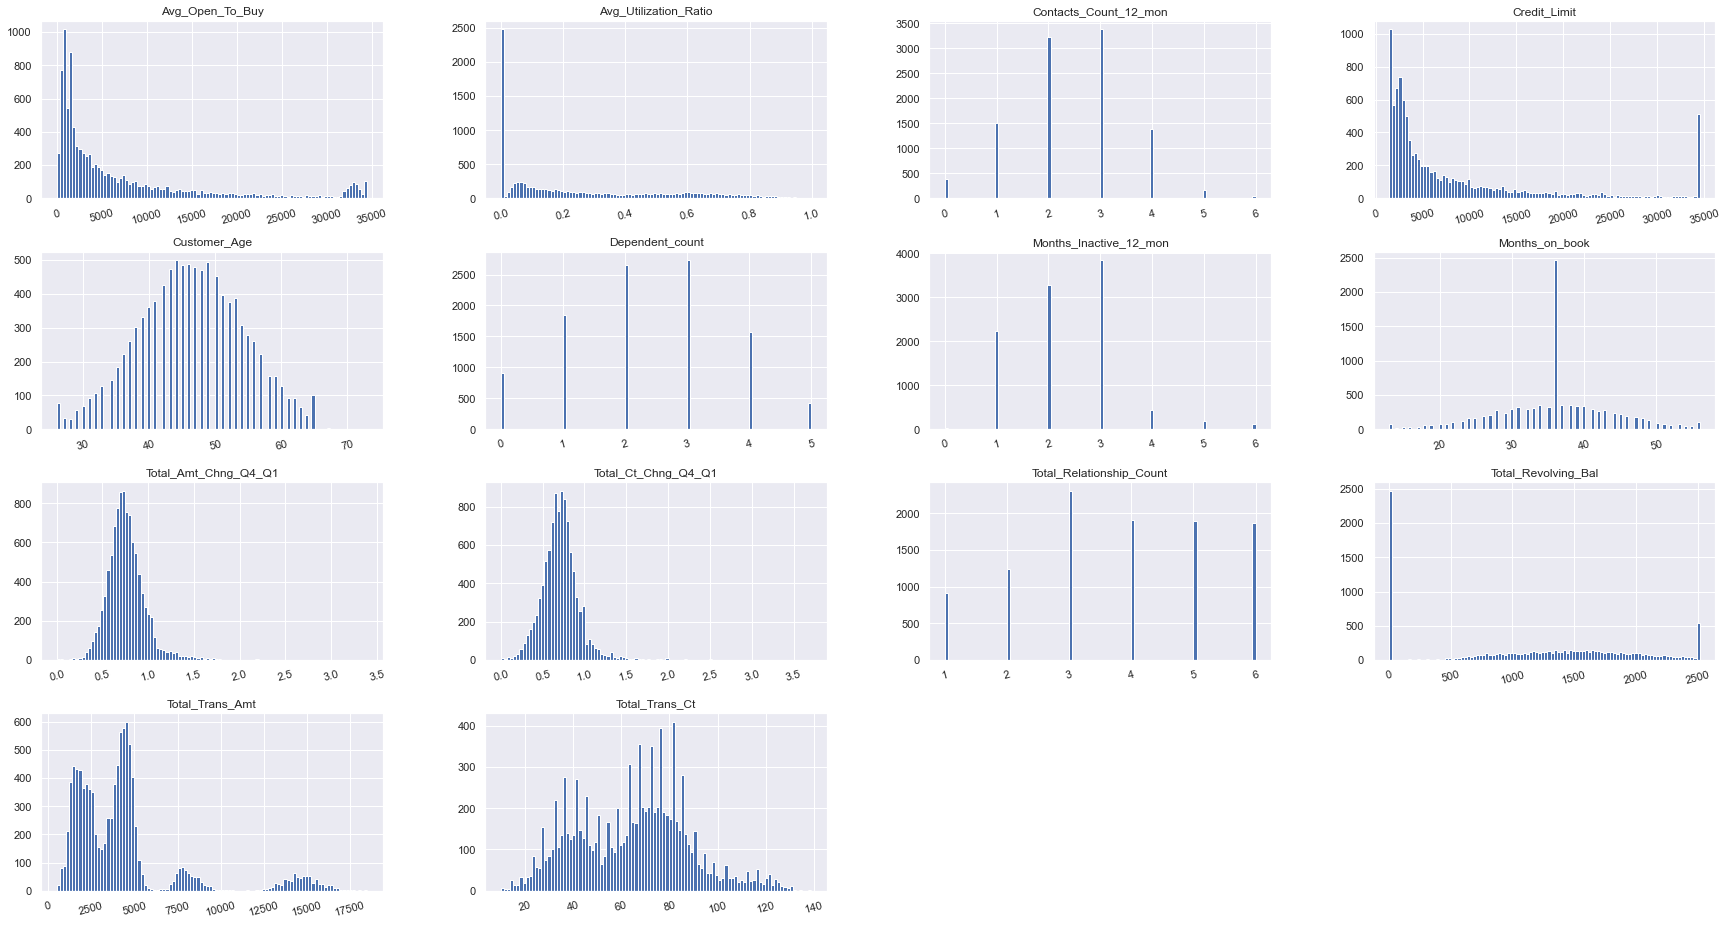

In [19]:
float_columns = [x for x in data.columns if x in data.select_dtypes('number')]
float_columns

#Plt histogram on numerical data
data.hist(figsize=(30,16), xrot=15, bins=int(data.shape[0]**0.5));

#Print Sknewness if skew value exceed 0.75
print("Numerical column skewness value > 0.75")
print("======================================")
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))
##print (skew_columns)
log_columns = skew_columns.loc[skew_columns > 0.75]
print (log_columns)


The histogram above show all the numerical data histogram graph to understand its distrubution.For better view, The code above show the numerical columns which exceed the skewness value of 0.75. The column that having skewness value that more than 0.75 means that it is not normal distribution.For the column that having skewness value less then 0.75 is normal distribution. By orserving the graph above, column which are not normal disribution normally does not have a regular bell shape. 

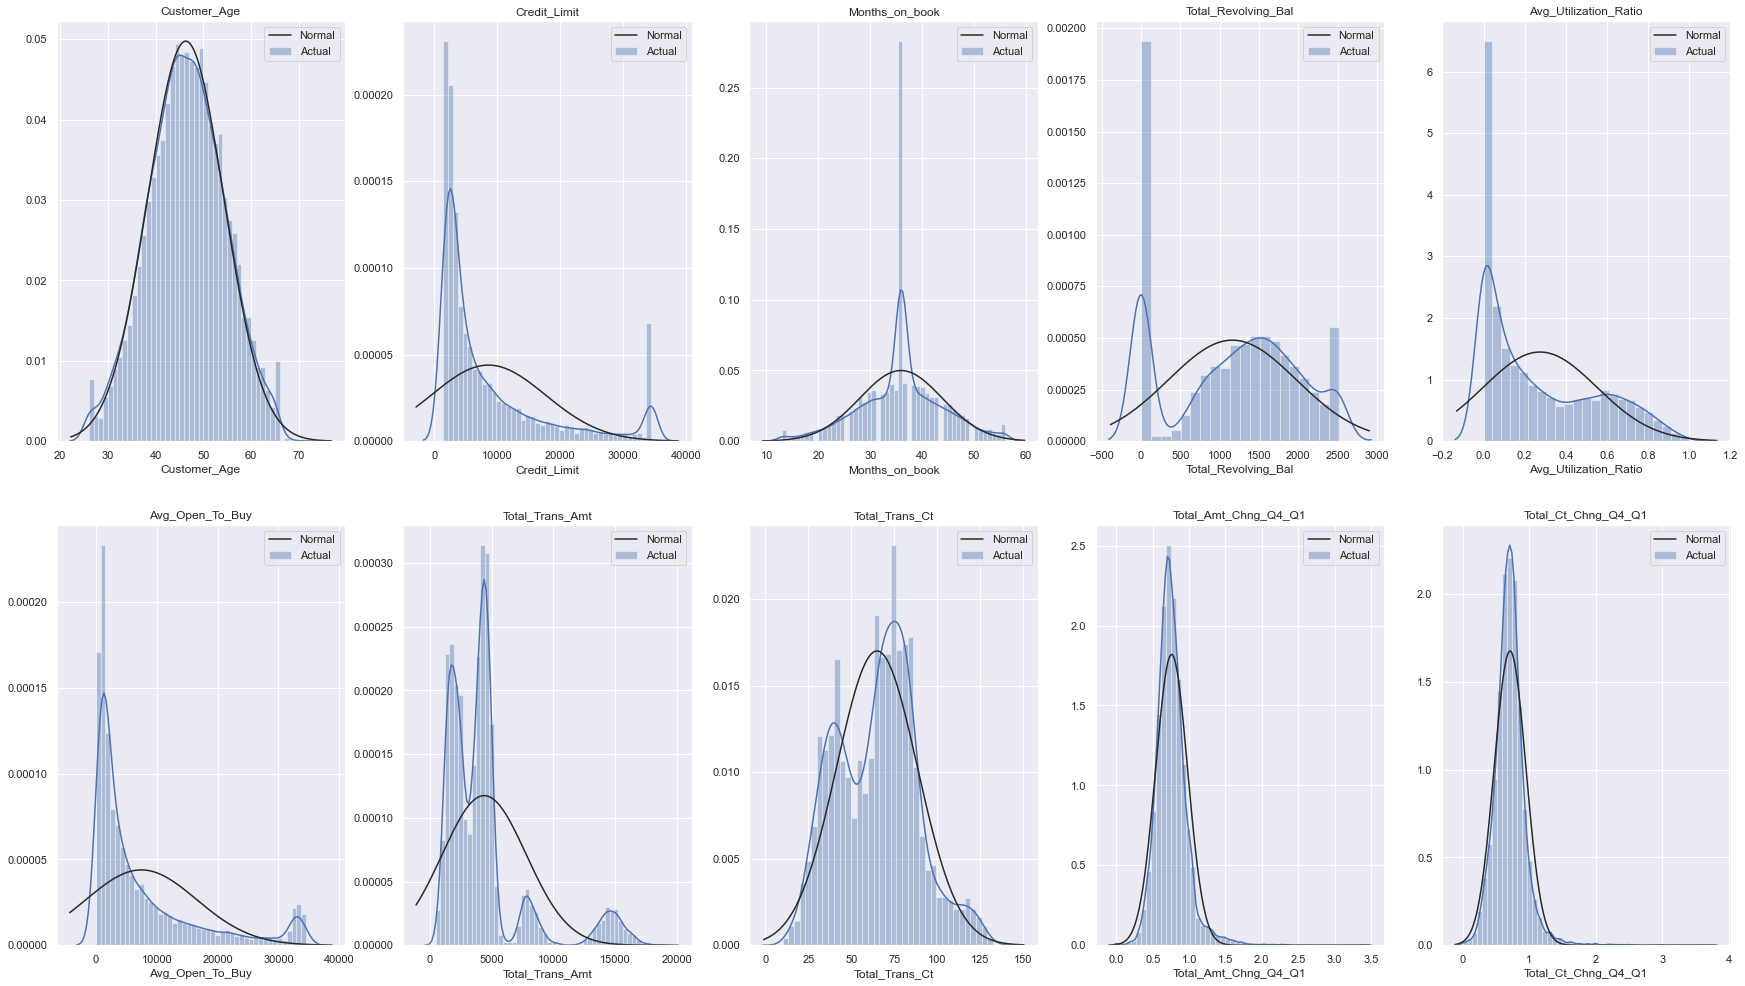

In [20]:
import matplotlib.patheffects as path_effects
from scipy.stats import norm
#Plot dist plot on numerical column
def plotDistPlot(df, columns):
    fig, ax = plt.subplots(len(columns)//5, 5,figsize=(30, 17)) ##adjust this to set size
    
    index = 0
    for i in range(2):
        for j in range(5):
            sns.distplot(df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

some_columns = ['Customer_Age', 'Credit_Limit', 'Months_on_book',
               'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Avg_Open_To_Buy',
               'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']          

plotDistPlot(data,some_columns)


Some columns is selected and ploting in the histogram with density line in normal and actual. Based on the graph above, the customer age is normal distribution since its skewness value is lower than 0.75. Besides, this pot also show that there is a right skew on Total_Ct_Chng_Q4_Q1, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1 ,Credit_Limit and Avg_Open_To_Buy.

 

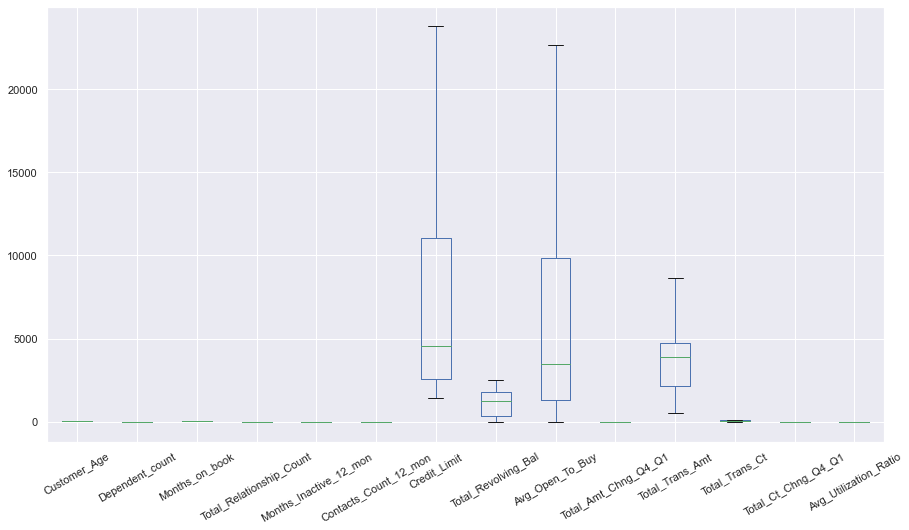

In [21]:
#Plot box plot on numerical column
data.plot(kind='box', figsize = (15,8), rot=30, showfliers=False);

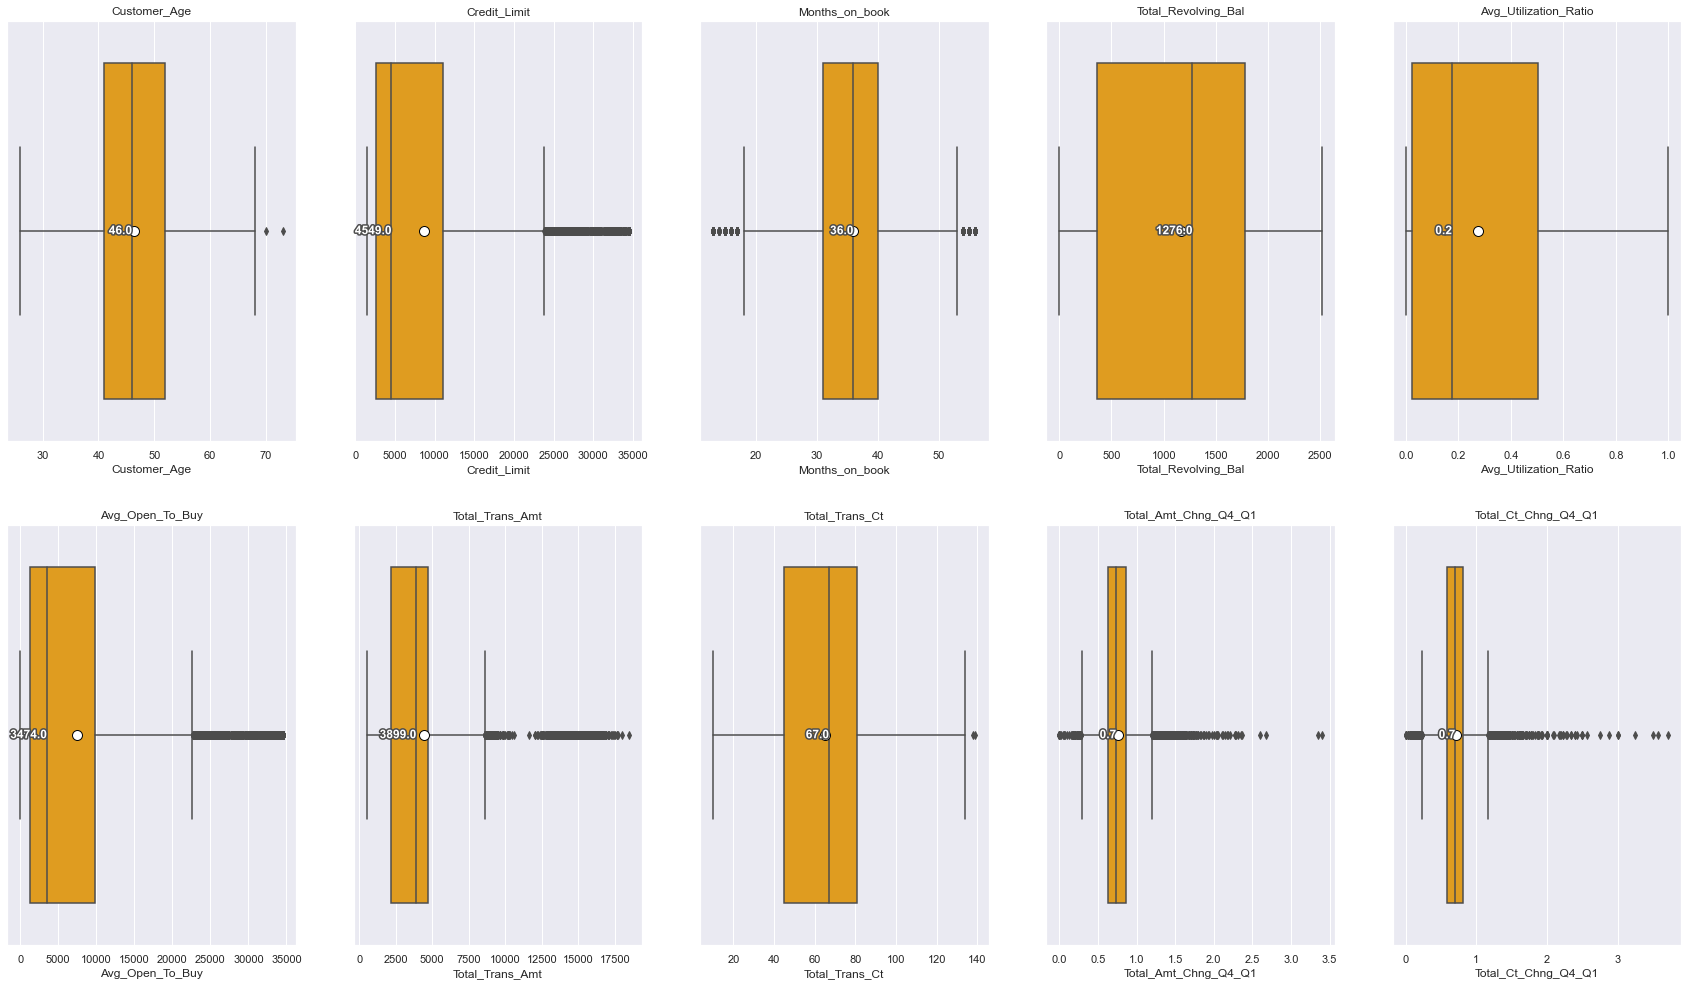

In [22]:
#Show mean value on box plot
def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='right', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])
#plot Box Plot        
def plotBoxPlot(df, columns):
    fig, ax = plt.subplots(len(columns)//5, 5,figsize=(30, 17)) ##adjust this to set size
    
    index = 0
    for i in range(2):
        for j in range(5):
            agePlot = sns.boxplot(df.loc[:, columns[index]],
                      color='orange',showmeans=True,
                        meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize": "10"},
                         ax=ax[i][j])
            add_median_labels(agePlot.axes)
            ax[i][j].set_title(columns[index])
            index += 1        
plotBoxPlot(data,some_columns)

The box plots above have shown the mean and median values for having a better view on the skewness.

In [23]:
data['Income_Category'] = data['Income_Category'].replace({
    'Unknown':0,
    'Less than $40K':1,
    '$40K - $60K':2,
    '$60K - $80K':3,
    '$80K - $120K':4,
    '$120K +':5
})

data['Gender'] = data['Gender'].replace({
    'M':0,
    'F':1,
})

data['Marital_Status'] = data['Marital_Status'].replace({
    'Unknown':0,
    'Single':1,
    'Married':2,
    'Divorced':3
})

data['Card_Category'] = data['Card_Category'].replace({
    'Blue':0,
    'Gold':1,
    'Platinum':2,
    'Silver':3
})

data['Education_Level'] = data['Education_Level'].replace({
    'Unknown':0,
    'Uneducated':1,
    'High School':2,
    'College':3,
    'Graduate':4,
    'Post-Graduate':5,
    'Doctorate':6
})


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [25]:
y = data[['Attrition_Flag']]
x = data.drop(columns=["Attrition_Flag"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 0, stratify = y)

categorical_data = ['Gender','Education_Level','Marital_Status','Card_Category','Income_Category']

#x_train_categorical = x_train[categorical_data]
#x_test_categorical = x_test[categorical_data]
#x_train_numerical = x_train.drop(columns=categorical_data, axis = 1)
#x_test_numerical = x_test.drop(columns=categorical_data, axis = 1)

In [26]:
##before log transform
x[log_columns.index.tolist()]

Total_Ct_Chng_Q4_Q1  Total_Trans_Amt  Total_Amt_Chng_Q4_Q1  \
0                    1.625             1144                 1.335   
1                    3.714             1291                 1.541   
2                    2.333             1887                 2.594   
3                    2.333             1171                 1.405   
4                    2.500              816                 2.175   
...                    ...              ...                   ...   
10122                0.857            15476                 0.703   
10123                0.683             8764                 0.804   
10124                0.818            10291                 0.819   
10125                0.722             8395                 0.535   
10126                0.649            10294                 0.703   

       Credit_Limit  Avg_Open_To_Buy  
0           12691.0          11914.0  
1            8256.0           7392.0  
2            3418.0           3418.0  
3            3313.0            796.0  
4            4716.0           4716.0  
...             ...              ...  
10122        4003.0           2152.0  
10123        4277.0           2091.0  
10124        5409.0           5409.0  
10125        5281.0           5281.0  
10126       10388.0           8427.0  

[10127 rows x 5 columns]

In [27]:
#after log tranform 
# Perform log transform on skewed columns
for col in log_columns.index.tolist():
    x[col] = np.log1p(x[col])


In [28]:
## after log transform
x[log_columns.index.tolist()]

Total_Ct_Chng_Q4_Q1  Total_Trans_Amt  Total_Amt_Chng_Q4_Q1  \
0                 0.965081         7.043160              0.848012   
1                 1.550537         7.163947              0.932558   
2                 1.203873         7.543273              1.279266   
3                 1.203873         7.066467              0.877550   
4                 1.252763         6.705639              1.155308   
...                    ...              ...                   ...   
10122             0.618962         9.647110              0.532391   
10123             0.520578         9.078522              0.590006   
10124             0.597737         9.239122              0.598287   
10125             0.543486         9.035511              0.428530   
10126             0.500169         9.239414              0.532391   

       Credit_Limit  Avg_Open_To_Buy  
0          9.448727         9.385553  
1          9.018817         8.908289  
2          8.137103         8.137103  
3          8.105911         6.680855  
4          8.458928         8.458928  
...             ...              ...  
10122      8.295049         7.674617  
10123      8.361241         7.645876  
10124      8.596004         8.596004  
10125      8.572060         8.572060  
10126      9.248503         9.039315  

[10127 rows x 5 columns]

In [29]:
#label encoder label y 
def prepare_targets(y_train, y_test):
    labelencoder = LabelEncoder()
    labelencoder.fit(y_train)
    y_train_enc = labelencoder.transform(y_train)
    y_test_enc = labelencoder.transform(y_test)
    return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train,y_test)

C:\Users\nigel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
x_train

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
3548            36       0                4                3               1   
3289            64       0                0                4               1   
6692            52       1                1                2               1   
6360            46       1                2                4               2   
2041            33       1                3                3               1   
...            ...     ...              ...              ...             ...   
4858            48       1                2                4               1   
2304            41       0                3                5               2   
2729            29       1                0                2               1   
8568            29       1                0                3               2   
3105            53       1                2                0               1   

      Income_Category  Card_Category  Months_on_book  \
3548                5              0              36   
3289                1              0              36   
6692                1              0              43   
6360                1              0              33   
2041                1              0              23   
...               ...            ...             ...   
4858                0              0              29   
2304                3              0              34   
2729                1              0              13   
8568                1              0              19   
3105                2              0              37   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3548                         5                       3                      3   
3289                         3                       3                      5   
6692                         6                       2                      2   
6360                         3                       3                      3   
2041                         6                       4                      1   
...                        ...                     ...                    ...   
4858                         6                       1                      2   
2304                         4                       2                      2   
2729                         6                       3                      5   
8568                         2                       1                      2   
3105                         5                       3                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3548       28200.0                  765          27435.0   
3289        3812.0                 2517           1295.0   
6692        2705.0                 1581           1124.0   
6360        2267.0                 1283            984.0   
2041        2562.0                 1968            594.0   
...            ...                  ...              ...   
4858        9554.0                 2337           7217.0   
2304        2624.0                 1319           1305.0   
2729        5240.0                 1608           3632.0   
8568        3261.0                 2517            744.0   
3105        7282.0                    0           7282.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3548                 0.680             2507              64   
3289                 0.586             2325              45   
6692                 0.851             5532              81   
6360                 0.761             4249              81   
2041                 0.546             2256              70   
...                    ...              ...             ...   
4858                 0.790             4049              71   
2304                 0.768             4189              74   
2729                 1.243             2712              64   
8568                 0.636             2461     

In [31]:
def select_features(x_train_process, y_train, x_test_process):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x_train[categorical_data], y_train)
    x_train_fs = fs.transform(x_train[categorical_data])
    x_test_fs = fs.transform(x_test[categorical_data])
    return x_train_fs, x_test_fs, fs


x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

Feature Gender: 2.520790
Feature Education_Level: 0.867891
Feature Marital_Status: 0.875907
Feature Card_Category: 0.441798
Feature Income_Category: 0.792270


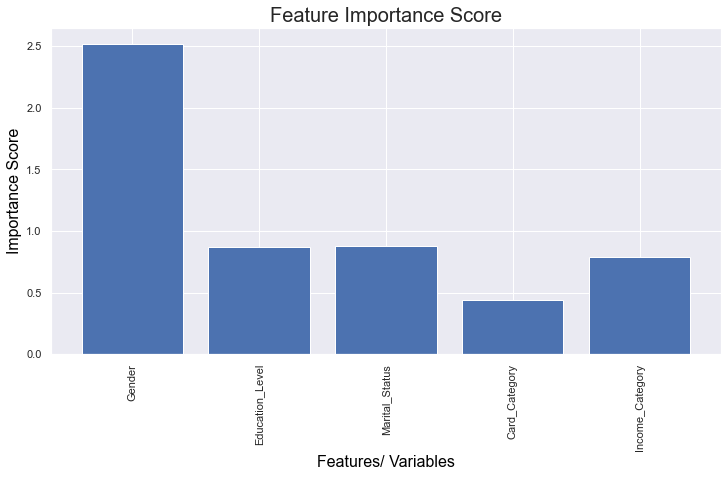

In [32]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (x[categorical_data].columns[i], fs.scores_[i]))
# plot the scores

plt.figure(figsize = (12,6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.xticks(range(len(x[categorical_data].columns)), x[categorical_data].columns,rotation=90)
plt.show()


In [33]:
def prepare_inputs(x_train, x_test):
    mms = MinMaxScaler()
    x_train[num_cols] = mms.fit_transform(x_train[num_cols])
    x_test[num_cols] = mms.transform(x_test[num_cols])
    return x_train,x_test


    
#mix_maxscaler
x_train_process, x_test_process = prepare_inputs(x_train,x_test)


<ipython-input-33-0f0f5d993b2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_cols] = mms.fit_transform(x_train[num_cols])
C:\Users\nigel\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-33-0f0f5d993b2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [34]:
x_train_process

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
3548      0.212766       0              0.8                3               1   
3289      0.808511       0              0.0                4               1   
6692      0.553191       1              0.2                2               1   
6360      0.425532       1              0.4                4               2   
2041      0.148936       1              0.6                3               1   
...            ...     ...              ...              ...             ...   
4858      0.468085       1              0.4                4               1   
2304      0.319149       0              0.6                5               2   
2729      0.063830       1              0.0                2               1   
8568      0.063830       1              0.0                3               2   
3105      0.574468       1              0.4                0               1   

      Income_Category  Card_Category  Months_on_book  \
3548                5              0        0.534884   
3289                1              0        0.534884   
6692                1              0        0.697674   
6360                1              0        0.465116   
2041                1              0        0.232558   
...               ...            ...             ...   
4858                0              0        0.372093   
2304                3              0        0.488372   
2729                1              0        0.000000   
8568                1              0        0.139535   
3105                2              0        0.558140   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3548                       0.8                0.500000               0.500000   
3289                       0.4                0.500000               0.833333   
6692                       1.0                0.333333               0.333333   
6360                       0.4                0.500000               0.500000   
2041                       1.0                0.666667               0.166667   
...                        ...                     ...                    ...   
4858                       1.0                0.166667               0.333333   
2304                       0.6                0.333333               0.333333   
2729                       1.0                0.500000               0.833333   
8568                       0.2                0.166667               0.333333   
3105                       0.8                0.500000               0.666667   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3548      0.809056             0.303933         0.794831   
3289      0.071761             1.000000         0.037435   
6692      0.038295             0.628129         0.032481   
6360      0.025053             0.509734         0.028424   
2041      0.033972             0.781883         0.017124   
...            ...                  ...              ...   
4858      0.245353             0.928486         0.209023   
2304      0.035846             0.524037         0.037725   
2729      0.114932             0.638856         0.105149   
8568      0.055104             1.000000         0.021470   
3105      0.176666             0.000000         0.210906   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3548              0.200177         0.111105        0.418605   
3289              0.172505         0.100979        0.271318   
6692              0.250515         0.279404        0.550388   
6360              0.224021         0.208023        0.550388   
2041              0.160730         0.097140        0.465116   
...                    ...              ...             ...   
4858              0.232558         0.196896        0.472868   
2304              0.226082         0.204685        0.496124   
2729              0.365911         0.122510        0.418605   
8568              0.187224         0.108546     

# Dirty Train Model

In [35]:
def model_training(classifier,x_train,x_test):
    start = time.time()
    classifier.fit(x_train, y_train)
    stop = time.time()
    trainingTime = stop - start
    print(f"Training time: {trainingTime}s")

    # Predicting the test set
    y_pred = classifier.predict(x_test)

    # Making the confusion matrix and calculating accuracy score
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    acscore.append(ac)
    acprecision.append(precision)
    acrecall.append(recall)
    acF1.append(f1)
    acTrainingTime.append(trainingTime)

    sns.heatmap(cm, xticklabels=['Predicted Churn', 'Predicted Not Churn'], yticklabels=['Actual_Churn', 'Actual_Not_Churn'],
                annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    print('Accuracy score: {0:0.3f}'.format(ac))
    print('Precision score: {0:0.3f}'.format(precision))
    print('Recall score: {0:0.3f}'.format(recall))
    print('F1 score: {0:0.3f}'.format(f1))
    print('Training Accuracy: ',classifier.score(x_train, y_train))
    print('Testing Accuracy: ',classifier.score(x_test, y_test))
    target_names = ['churn', 'not churn']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
def model_roc_curve(classifier,x_train,x_test):
    classifier.fit(x_train, y_train)
    predProb = classifier.predict_proba(x_test)
    preds = predProb[:,1]
    fpr, tpr,threshold = metrics.roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    roc_curve(fpr,tpr,roc_auc)

In [36]:
def roc_curve(fpr,tpr,roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Logistic Regression

C:\Users\nigel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 0.12865567207336426s
Accuracy score: 0.901
Precision score: 0.914
Recall score: 0.974
F1 score: 0.943
Training Accuracy:  0.9034988713318285
Testing Accuracy:  0.9012833168805529
              precision    recall  f1-score   support

       churn       0.79      0.52      0.63       488
   not churn       0.91      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.85      0.75      0.79      3039
weighted avg       0.89      0.90      0.89      3039



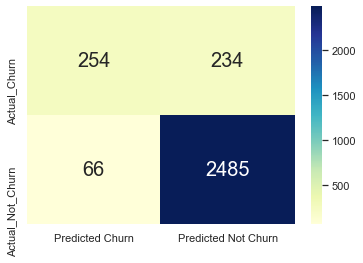

In [37]:
acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []

from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(random_state=0)
model_training(Logistic,x_train_process,x_test_process)



C:\Users\nigel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


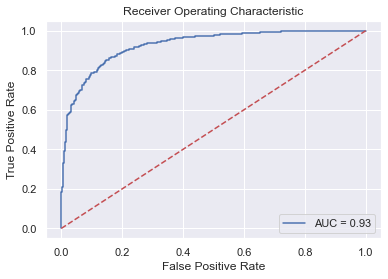

In [38]:
model_roc_curve(Logistic,x_train_process,x_test_process)

## Gaussian Naive Bayes

Training time: 0.007981061935424805s
Accuracy score: 0.892
Precision score: 0.937
Recall score: 0.935
F1 score: 0.936
Training Accuracy:  0.8862866817155757
Testing Accuracy:  0.8920697597894044
              precision    recall  f1-score   support

       churn       0.66      0.67      0.67       488
   not churn       0.94      0.93      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.80      0.80      0.80      3039
weighted avg       0.89      0.89      0.89      3039



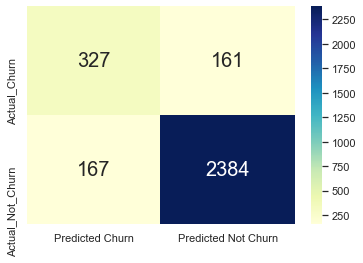

In [39]:
# Predicting the test set
#GNB
#from sklearn.naive_bayes import GaussianNB

GNBclassifier = GaussianNB()
model_training(GNBclassifier,x_train_process,x_test_process)

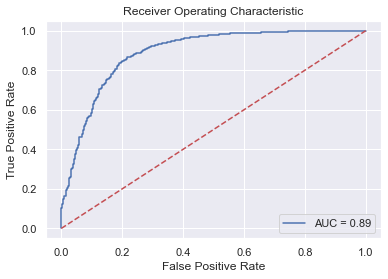

In [40]:
model_roc_curve(GNBclassifier,x_train_process,x_test_process)

## Support Vector Machine

Training time: 4.215832948684692s
Accuracy score: 0.894
Precision score: 0.895
Recall score: 0.991
F1 score: 0.940
Training Accuracy:  0.8941873589164786
Testing Accuracy:  0.8940440934517934
              precision    recall  f1-score   support

       churn       0.89      0.39      0.54       488
   not churn       0.89      0.99      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.89      0.69      0.74      3039
weighted avg       0.89      0.89      0.88      3039



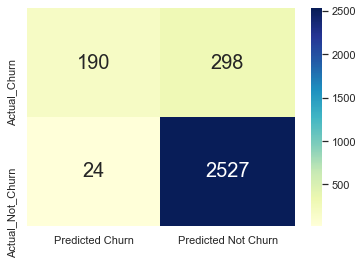

In [41]:
svc = SVC(probability=True,random_state = 0)
model_training(svc,x_train_process,x_test_process)


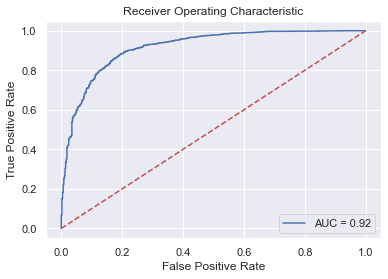

In [42]:
model_roc_curve(svc,x_train_process,x_test_process)

## KNN

Training time: 0.046874284744262695s
Accuracy score: 0.861
Precision score: 0.872
Recall score: 0.978
F1 score: 0.922
Training Accuracy:  0.8888261851015802
Testing Accuracy:  0.8611385324119776
              precision    recall  f1-score   support

       churn       0.68      0.25      0.37       488
   not churn       0.87      0.98      0.92      2551

    accuracy                           0.86      3039
   macro avg       0.78      0.61      0.65      3039
weighted avg       0.84      0.86      0.83      3039



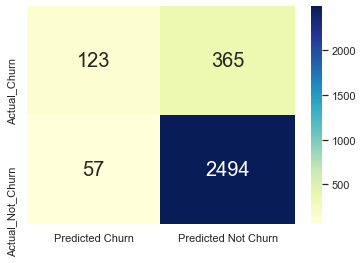

In [43]:
KNN = KNeighborsClassifier()


model_training(KNN,x_train_process,x_test_process)


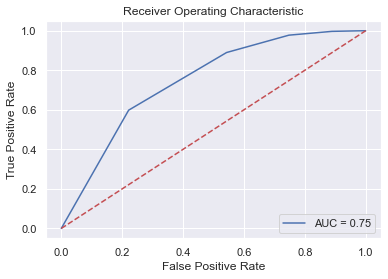

In [44]:
model_roc_curve(KNN,x_train_process,x_test_process)

## Decision Tree

Training time: 0.05389523506164551s
Accuracy score: 0.938
Precision score: 0.960
Recall score: 0.966
F1 score: 0.963
Training Accuracy:  1.0
Testing Accuracy:  0.9381375452451465
              precision    recall  f1-score   support

       churn       0.82      0.79      0.80       488
   not churn       0.96      0.97      0.96      2551

    accuracy                           0.94      3039
   macro avg       0.89      0.88      0.88      3039
weighted avg       0.94      0.94      0.94      3039



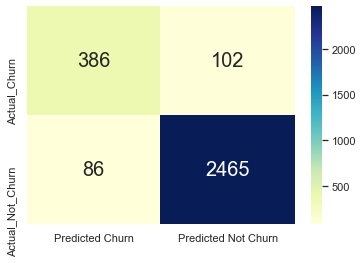

In [45]:
DTC = DecisionTreeClassifier(random_state = 0)

model_training(DTC,x_train_process,x_test_process)

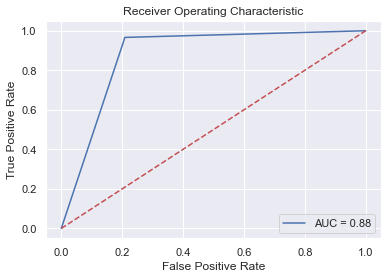

In [46]:
model_roc_curve(DTC,x_train_process,x_test_process)

## Random Forest

Training time: 1.181028127670288s
Accuracy score: 0.963
Precision score: 0.970
Recall score: 0.987
F1 score: 0.978
Training Accuracy:  1.0
Testing Accuracy:  0.9634748272458046
              precision    recall  f1-score   support

       churn       0.92      0.84      0.88       488
   not churn       0.97      0.99      0.98      2551

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039



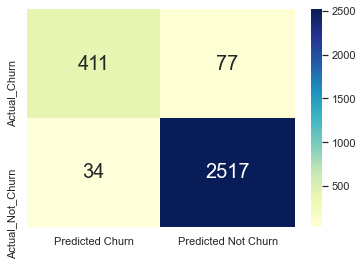

In [47]:
RFC = RandomForestClassifier(random_state = 0)

model_training(RFC,x_train_process,x_test_process)

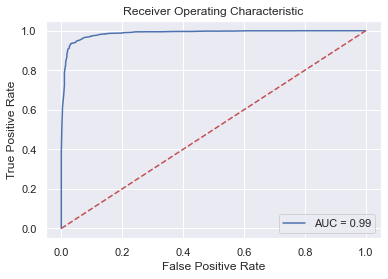

In [48]:
model_roc_curve(RFC,x_train_process,x_test_process)

## Stochastic Gradient Descent

Training time: 0.04053807258605957s
Accuracy score: 0.904
Precision score: 0.925
Recall score: 0.963
F1 score: 0.944
Training Accuracy:  0.9033577878103838
Testing Accuracy:  0.9039157617637381
              precision    recall  f1-score   support

       churn       0.76      0.59      0.67       488
   not churn       0.93      0.96      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.84      0.78      0.80      3039
weighted avg       0.90      0.90      0.90      3039



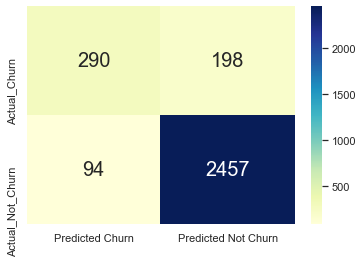

In [49]:
SGDC = SGDClassifier(shuffle=False,loss="log",random_state = 0)

model_training(SGDC,x_train_process,x_test_process)

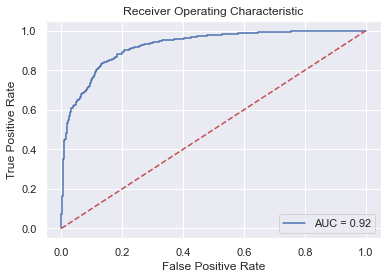

In [50]:
model_roc_curve(SGDC,x_train_process,x_test_process)

## XGBoost

C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 0.6926553249359131s
Accuracy score: 0.972
Precision score: 0.979
Recall score: 0.987
F1 score: 0.983
Training Accuracy:  1.0
Testing Accuracy:  0.9717012175057584
              precision    recall  f1-score   support

       churn       0.93      0.89      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.96      0.94      0.95      3039
weighted avg       0.97      0.97      0.97      3039



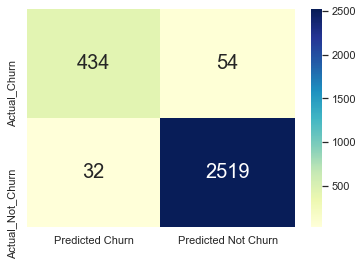

In [51]:
#xgboost

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb

m_xgb = xgb.XGBClassifier(random_state = 0)

model_training(m_xgb,x_train_process,x_test_process)

[22:24:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


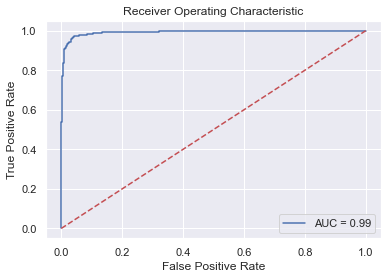

In [52]:
model_roc_curve(m_xgb,x_train_process,x_test_process)

In [53]:
# Visualising the accuracy score of each classification model

def plotEvaluationMetrics(models,y,title):
    plt.rcParams['figure.figsize']=15,8 
    sns.set_style("darkgrid")
    ax = sns.barplot(x=models, y=y, palette = "rocket", saturation =1.5)
    plt.xlabel("Classifier Models", fontsize = 20 )
    plt.ylabel("% of Accuracy", fontsize = 20)
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        xPlot, yPlot = p.get_xy() 
        ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

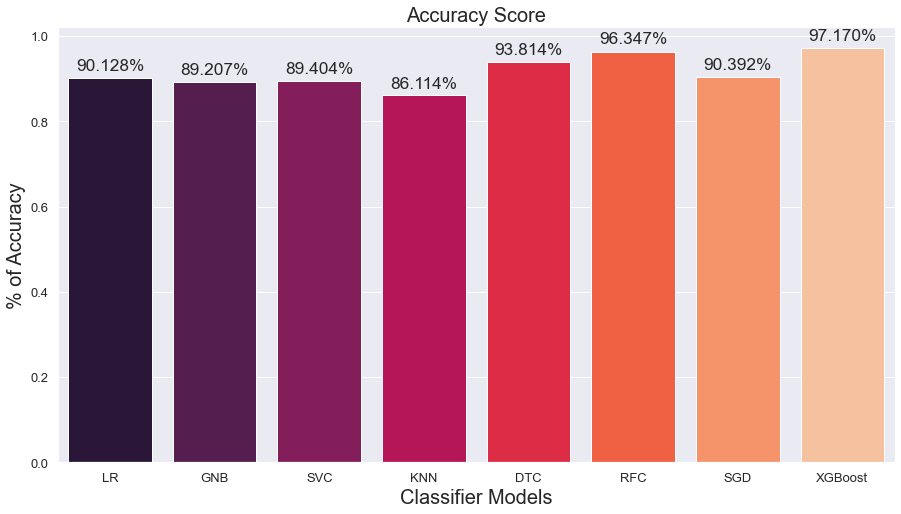

In [54]:
# every model accuracy graph
models = ['LR','GNB','SVC','KNN', 'DTC', 'RFC', 'SGD','XGBoost']
# Visualising the accuracy score of each classification model
plotEvaluationMetrics(models,acscore,"Accuracy Score")

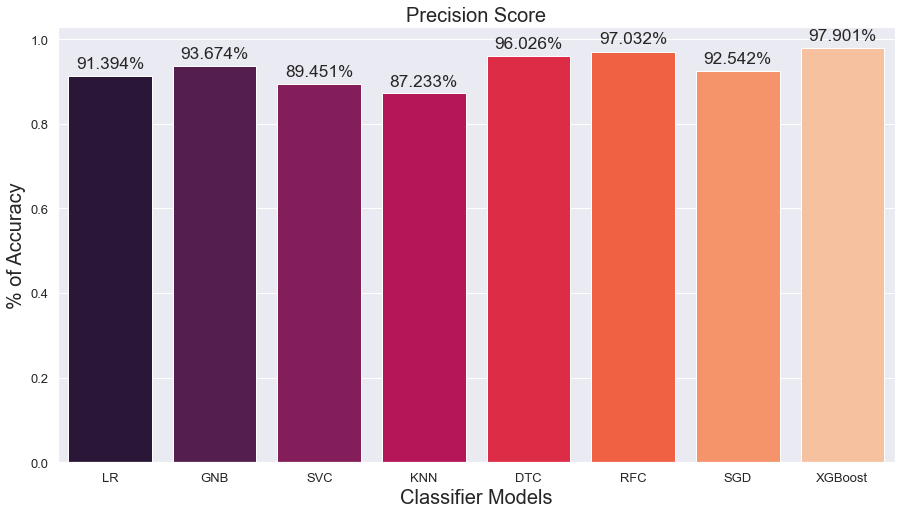

In [55]:
plotEvaluationMetrics(models,acprecision,"Precision Score")

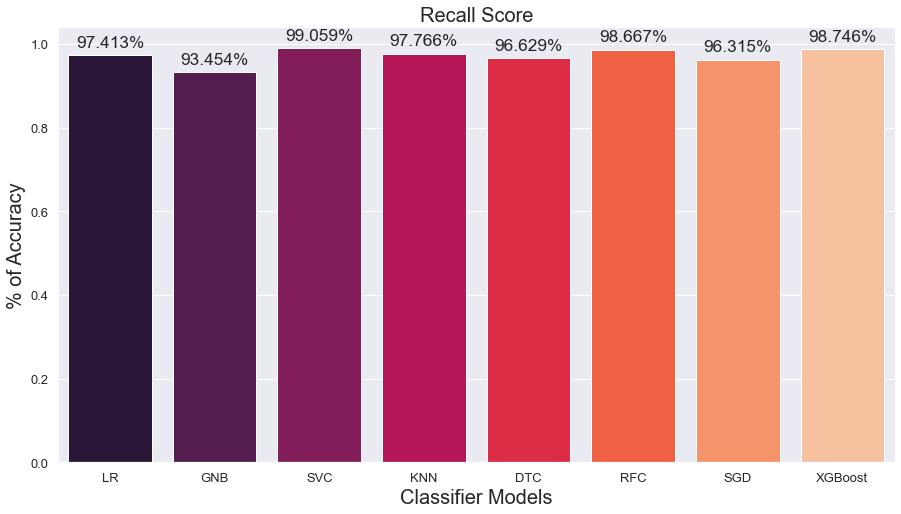

In [56]:
plotEvaluationMetrics(models,acrecall,"Recall Score")

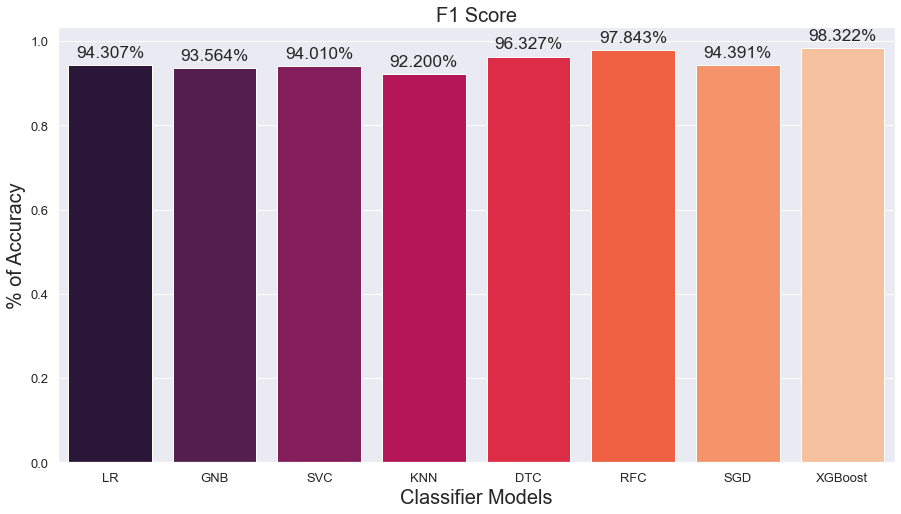

In [57]:
plotEvaluationMetrics(models,acF1,"F1 Score")

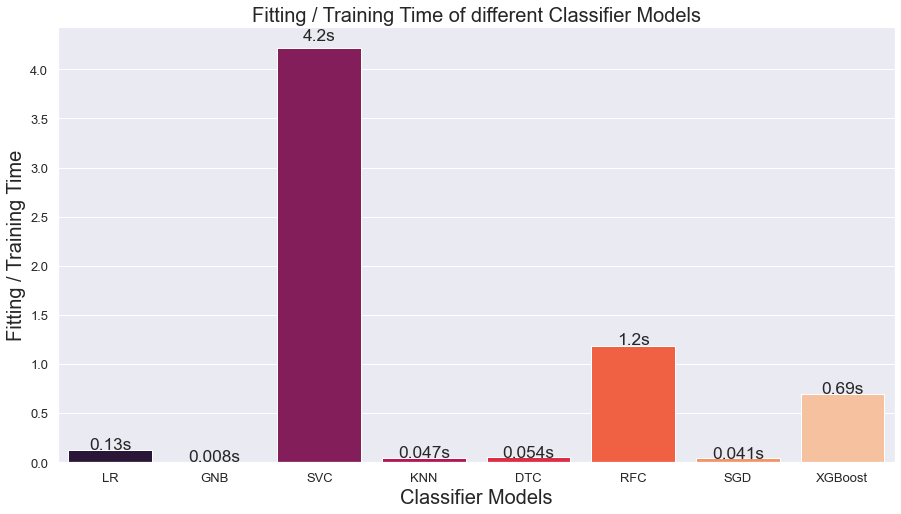

In [58]:
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acTrainingTime, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("Fitting / Training Time", fontsize = 20)
plt.title("Fitting / Training Time of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2}''s', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [59]:
x_process_concat = pd.concat([x_train_process,x_test_process])

In [60]:
x_process_concat

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
3548      0.212766       0              0.8                3               1   
3289      0.808511       0              0.0                4               1   
6692      0.553191       1              0.2                2               1   
6360      0.425532       1              0.4                4               2   
2041      0.148936       1              0.6                3               1   
...            ...     ...              ...              ...             ...   
5750      0.234043       1              0.4                2               1   
7577      0.659574       1              0.4                4               2   
3458      0.510638       0              0.6                1               1   
8907      0.404255       1              0.0                6               2   
6659      0.574468       0              0.0                2               2   

      Income_Category  Card_Category  Months_on_book  \
3548                5              0        0.534884   
3289                1              0        0.534884   
6692                1              0        0.697674   
6360                1              0        0.465116   
2041                1              0        0.232558   
...               ...            ...             ...   
5750                2              0        0.325581   
7577                1              0        0.627907   
3458                4              0        0.581395   
8907                2              3        0.534884   
6659                2              0        0.604651   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3548                       0.8                0.500000               0.500000   
3289                       0.4                0.500000               0.833333   
6692                       1.0                0.333333               0.333333   
6360                       0.4                0.500000               0.500000   
2041                       1.0                0.666667               0.166667   
...                        ...                     ...                    ...   
5750                       0.6                0.166667               0.333333   
7577                       0.8                0.500000               0.333333   
3458                       1.0                0.333333               0.000000   
8907                       0.0                0.166667               0.500000   
6659                       0.8                0.333333               0.333333   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3548      0.809056             0.303933         0.794831   
3289      0.071761             1.000000         0.037435   
6692      0.038295             0.628129         0.032481   
6360      0.025053             0.509734         0.028424   
2041      0.033972             0.781883         0.017124   
...            ...                  ...              ...   
5750      0.023149             0.365117         0.037145   
7577      0.005765             0.470799         0.012778   
3458      0.253092             0.730234         0.230899   
8907      0.534157             0.370679         0.526497   
6659      0.043434             0.663886         0.034798   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3548              0.200177         0.111105        0.418605   
3289              0.172505         0.100979        0.271318   
6692              0.250515         0.279404        0.550388   
6360              0.224021         0.208023        0.550388   
2041              0.160730         0.097140        0.465116   
...                    ...              ...             ...   
5750              0.209597         0.225047        0.558140   
7577              0.225493         0.244075        0.565891   
3458              0.194583         0.096640        0.240310   
8907              0.259052         0.471626     

In [61]:
y_concat =  np.concatenate((y_train, y_test), axis=None)

In [62]:
y_concat

array([1, 0, 1, ..., 1, 1, 1])

In [63]:
from sklearn.model_selection import cross_val_score

CVMean = []
CVSD = []

tupleModel = [LogisticRegression(random_state=0,max_iter=10000),GaussianNB(),SVC(probability=True),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SGDClassifier(loss="log"),xgb.XGBClassifier()]
a = 0
for model in models:
    model = cross_val_score(tupleModel[a],x_process_concat, y_concat,cv=5,scoring='accuracy')
    print(models[a],":",model)
    CVMean.append(model.mean())
    CVSD.append(model.std())
    a+=1


LR : [0.90029615 0.89684107 0.90271605 0.91209877 0.90518519]
GNB : [0.88153998 0.88153998 0.88493827 0.88641975 0.89481481]
SVC : [0.89042448 0.88746298 0.89679012 0.89580247 0.89530864]
KNN : [0.86130306 0.85587364 0.85481481 0.85876543 0.85728395]
DTC : [0.93484699 0.93583416 0.94271605 0.93333333 0.93481481]
RFC : [0.96051333 0.96051333 0.96148148 0.9654321  0.96493827]
SGD : [0.86969398 0.8899309  0.89975309 0.90814815 0.89925926]
[22:25:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nigel\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

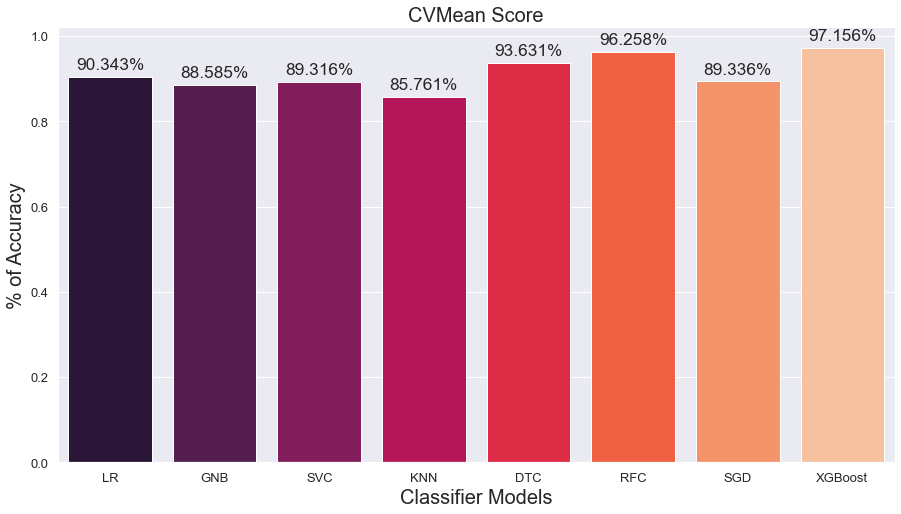

In [64]:
plotEvaluationMetrics(models,CVMean,"CVMean Score")

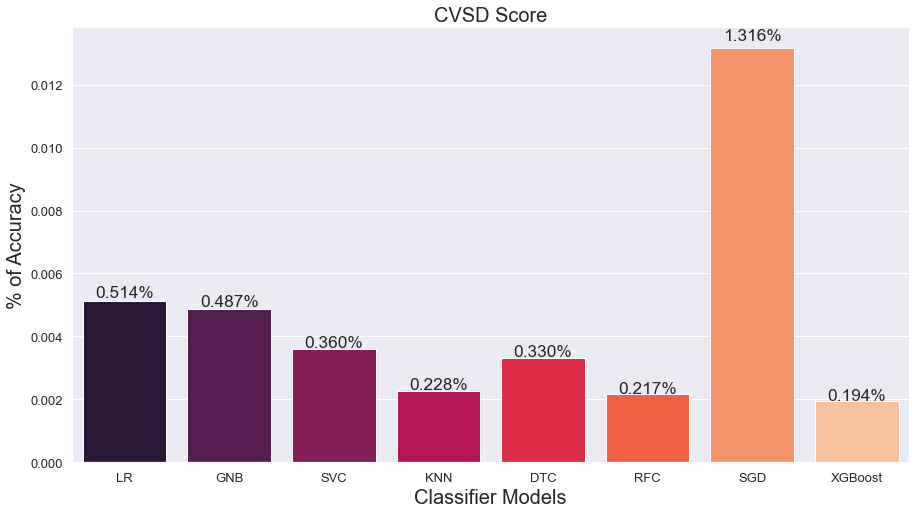

In [65]:
plotEvaluationMetrics(models,CVSD,"CVSD Score")